# Monty Hall problem

This Jupyter Notebook analyses the famous TV show game known as the Monty Hall problem. The game works as follows:

(1) There are 3 Doors to choose from. Only one contains the Prize.

(2) Initially you get to choose 1 Door, which remains closed.

(3) The Showman opens one of the 2 remaining Doors (always the one which does NOT contain the Prize).

(4) At this point you get the opportunity to change your initial choice for the Door the Showman did not open.

(5) Once you make the decision of whether or not to change, the result is revealed and you win or lose


## Should you Change your initial choice?
In the TV show, most people decide to stick with their initial choices. One of the reasons people tend to refuse to change is human psicology: "what if the door I chose first had the Prize already?" Yes, the feeling of losing is bad; however, it's even worse to discover that you were about to win but you just lost because you changed your mind.

Setting feelings aside, can we use Statistics to show which game strategy is optimal? A quick formal analysis of the game shows that if we "Never Change Doors" (like most people do) our chances of winning are 1/3 (33.3%). In contrast, if we "Always Change Doors" (the unpopular way) our chances essentially double to 2/3 (66.6%).

In popular culture, people find this result hard to believe as it is not very intuitive. People may not properly understand formal statistics, but they readily understand the "brute force" approach: "why not play the game many times, using both strategies and see which one works best?"

The essence of Probability is that if we repeat the experiment many times, the results will eventually ressemble the formal result. So if we play the Monty Hall game many times we should be able to reproduce the formal results of 1/3 (33.3%) for the "NeverChange" strategy and 2/3 (66.6%) for the "AlwaysChange" strategy.

## The Game
First of all, we will play a single round of the Monty Hall game so that we become familiar with the rules and with the Python programming language

In [68]:
import numpy as np
import matplotlib.pyplot as plt

We start by randomly selecting the Door behind which the Prize will be:

In [69]:
# doors contains the numbers of the 3 Doors
doors = [0, 1, 2]
# Draw a random number from the Integers up to 2
prize = np.random.randint(3)
print('The Prize is behind Door #%d' %prize)

The Prize is behind Door #2


### Let's make our first choice
Assuming we don't know where the Prize actually is, we randomly Choose a Door 

In [70]:
first_choice = np.random.randint(3)
print("I choose Door #%d because it's my favourite number" %first_choice)

I choose Door #1 because it's my favourite number


### Time to open one Door
Now the Showman will open one of the 2 Doors I didn't choose

In [71]:
# The 2 Doors that I did NOT choose
remaining_doors = [door for door in doors if door!= first_choice]

if prize in remaining_doors:
    # If the Prize is in one of the Two Remaining Doors
    # they showman will choose to show us the one WITHOUT the prize
    shown_door = [door for door in remaining_doors if door!=prize]
    shown_door = shown_door[0]
    not_shown_door = prize
    
elif prize not in remaining_doors:
    # If the Prize is NOT in any of the Two Remaining Doors
    # then it doesn't matter which one the TV showman chooses
    # By default he chooses the one on the left
    shown_door = remaining_doors[0]
    not_shown_door = remaining_doors[1]
    
print('Showman opens Door #%d' %shown_door)
if prize != shown_door:
    print('The Door is empty!')

Showman opens Door #0
The Door is empty!


### The dreadful Choice
At this point the Showman offers us the opportunity to change our initial choice for the Door that he didn't open.
If we set the "AlwaysChange" strategy to True, then we will change our initial choice. If not, then we keep our initial door.

In [5]:
AlwaysChange = True

if AlwaysChange:
    print('We decide to change from Door #%d to Door #%d' 
          %(first_choice, not_shown_door))
    new_choice = not_shown_door
    
if not AlwaysChange:
    print('We decide to stick with our first choice: Door #%d' 
          %(first_choice))
    new_choice = first_choice

We decide to change from Door #0 to Door #1


### The moment of Truth
Depending on our strategy "AlwaysChange" or "NeverChange" we will see what happens

In [72]:
if new_choice == prize:
    print('Congratulations you just won!')
if new_choice != prize:
    print('Oh! You have lost')

Oh! You have lost


## Generalization to many rounds

Now that we understand how the game operates, we will use Large Number statistics to investigate whether the "AlwaysChange" strategy really pays off.

Playing only 1 round is not very significant, as we can just be unlucky and change our choice when the prize was already in our first choice.
But if we play many (thousands) of rounds the effects of luck will become negligible

In [27]:
def MontyHall_round(strategy):
    """ 
    This function simulates a single round of Monty Hall
    making the choice of whether or not to Change Doors depending
    on a given strategy
    
    Returns 1 if you win, returns 0 if you loose
    """
    doors = [0, 1, 2]
    prize = np.random.randint(3)
    first_choice = np.random.randint(3)
    remaining_doors = [door for door in doors if door!= first_choice]
    
    if prize in remaining_doors:
        shown_door = [door for door in remaining_doors if door!=prize]
        shown_door = shown_door[0]
        not_shown_door = prize
    elif prize not in remaining_doors:
        shown_door = remaining_doors[0]
        not_shown_door = remaining_doors[1]

    if strategy == 'AlwaysChange':
        new_choice = not_shown_door
    
    if strategy == 'NeverChange':
        new_choice = first_choice
        
    if new_choice == prize:
        return 1
        
    return 0

### Playing many rounds
Here we have set the number of games to be played to 10000, but feel free to change it to see how it affects the result. We will play N_games for each of the 2 strategies: "AlwaysChange" and "NeverChange".

For each strategy, everytime we win we add 1 to the list "results"

In [79]:
N_games = 10000
results_always_change = []
results_never_change = []

for i in range(N_games):  # Loop over each Game
    
    # Play a round Changing Doors
    game_always_change = MontyHall_round(strategy='AlwaysChange')
    # Play a round Without Changing Doors
    game_never_change = MontyHall_round(strategy='NeverChange')
    
    # If we win, we add 1 to our lists
    if game_always_change == 1:
        results_always_change.append(1)
    if game_never_change == 1:
        results_never_change.append(1)

## Busting the Myth
Now it's the moment of Truth. We will count how many times we have won with each strategy and see if it really pays off to Always change Doors.

The results should approach the 1/3 (33.3%) and 2/3 (66.6%) success ratios

In [80]:
N_wins_always = len(results_always_change)
N_wins_never = len(results_never_change)
print('After playing %d rounds:' %N_games)
print('Rounds won without Changing Doors = %d (%.1f)' %(N_wins_never, 100*N_wins_never/N_games))
print('Rounds won Changing Doors = %d (%.1f)' %(N_wins_always, 100*N_wins_always/N_games))


After playing 10000 rounds:
Rounds won without Changing Doors = 3308 (33.1)
Rounds won Changing Doors = 6670 (66.7)


# Conclusions
(1) We have shown that the laws of Probability are not broken. When we repeat an experiment (in this case a Game) many times, the results are approximately the ones derived using formal methods

(2) We have shown that in the Monty Hall game, the unpopular strategy of "Always Changing Doors" makes you win 2 out 3 games, whereas "Keeping your Initial Choice" only makes you win 1 out of 3 games. In order to do this, we have used the fair and transparent approach of playing many games and see what happens. No fancy mathematics, no mind tricks! Just pure "brute force" in a computer

## (Extra) Impact of Number of Games played in Statistics

As we have mentioned above, Probability works well when we repeat the experiments sufficient times. But when you run the experiment just a few times, the results may deviate a lot from the formal result. For instance, one can go to the Casino bet at number 7 in the Roulette, be lucky and win straight away. If that happens, you could just collect your money, run back home and claim to be 100% successful at Roulette. The same is true if you lose all your money immediately and realise your success ratio was 0%.

As a single person, if you go to the TV show and play the Monty Hall game, you only get one chance. It is not until many people play that we start to see the probabilistic rules take effect. To see how this effect impacts the Monty Hall game we will do the following analysis.

## Analysis
(1) Let us assume we have 10 people playing the game (M_person = 10) and that each person is allowed to play N_games in a row. 

(2) We will change the number of games people are allowed to play (N_games) from 1 up to 10000. 

(3) For each case of N_games, we will make each of the 20 people play (using both Strategies) and record the results

In [93]:
N_games = np.array([1, 2, 5, 10, 50, 100, 500, 1000, 10000])
N = N_games.shape[0]    # Number of Cases of N_games
M_person = 20           # Number of People playing

# Number of times each person M_person wins being allowed to play N games
wins_always = np.zeros((N, M_person))
wins_never = np.zeros((N, M_person))

for j in range(M_person):   # Loop over the number of People
    for i in range(N):      # Loop over each number of Games allowed
        results_always = []
        results_never = []
        games_to_play = N_games[i]
        
        for k in range(games_to_play):  # Run N_games for each (Person, N_games)
            game_always = MontyHall_round(strategy='AlwaysChange')
            game_never = MontyHall_round(strategy='NeverChange')
            if game_always == 1:
                results_always.append(1)
            if game_never == 1:
                results_never.append(1)
                
        # Divide by each N_games to get the Win Ratio
        wins_always[i, j] = len(results_always)/games_to_play
        wins_never[i, j] = len(results_never)/games_to_play
        

## Results
Now we plot the results and try to learn something out of them. The X-axis shows "How many Rounds people are allowed to play" and the Y-axis shows the "Win Percentage". Each point in the graph represents a person.

Let's begin with the "Never Chaning Doors" strategy

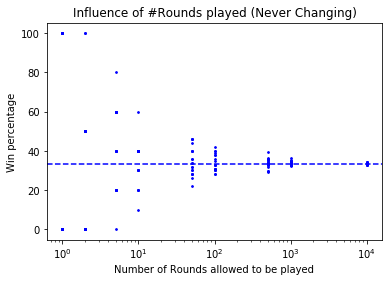

In [94]:
plt.figure()
for i in range(N):
    n = N_games[i]*np.ones(M_person)
    plt.scatter(n, 100*wins_never[i], color='blue', s=3)
plt.xscale('log')
plt.ylabel('Win percentage')
plt.xlabel('Number of Rounds allowed to be played')
plt.title('Influence of #Rounds played (Never Changing)')
plt.axhline(y=33.333, color='blue', linestyle='--')
plt.show()

On the left side of the graph, we can see that if players are only allowed to play 1 round ($10^0$), some of them always win (100%) and some of them always lose (0%). When players are allowed to play 2 rounds, some win both rounds (100%), some win one round and lose the other (50%) and some lose both rounds (0%). But as we increase the number of Rounds allowed to be played, all players converge to the known 33.3% ratio.

You could think that this means our previous result about the optimal strategy does not apply to the N_games = 1 case, because some people always win (100%). The truth is that as we have allowed 20 people to play 1 round each (the realistic scenario) we could compute the average success accross those 20 people.

As shown below, even though some people win 1 out of 1 rounds and go home very happy with a 100% success rate, when we average over several contestants, the 33.3% ratio still holds

In [109]:
import pandas as pd

average_never = np.mean(wins_never, axis=1)
df = pd.DataFrame(average_never, index=N_games).T
df.set_axis(labels=['Average Success Ratio'], axis=0)
df

,1,2,5,10,50,100,500,1000,10000
Average Success Ratio,0.35,0.3,0.41,0.345,0.349,0.3385,0.3361,0.33625,0.33516


If we repeat the same analysis for the "Always Change" strategy we will see the results are quite similar. The only difference is that this time the average win ratio is 2/3 (66.6%) suggesting that this strategy definitely beats the previous one

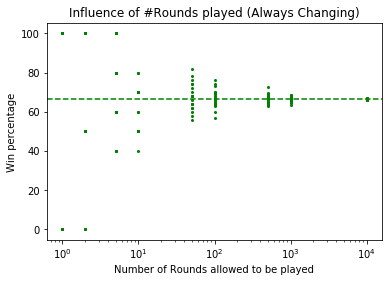

In [110]:
plt.figure()
for i in range(N):
    n = N_games[i]*np.ones(M_person)
    plt.scatter(n, 100*wins_always[i], color='green', s=4)
plt.xscale('log')
plt.ylabel('Win percentage')
plt.xlabel('Number of Rounds allowed to be played')
plt.title('Influence of #Rounds played (Always Changing)')
plt.axhline(y=66.666, color='green', linestyle='--')
plt.show()


In [111]:
average_always = np.mean(wins_always, axis=1)
df = pd.DataFrame(average_always, index=N_games).T
df.set_axis(labels=['Average Success Ratio'], axis=0)
df

,1,2,5,10,50,100,500,1000,10000
Average Success Ratio,0.75,0.6,0.71,0.625,0.677,0.668,0.6655,0.66655,0.66408
